# Unloading Manuscript
## Figures 7 and 8 
### Step 2: load the results from `manual_compute` and plot them here

created by Cassie Lumbrazo\
date: Jan 2026\
python environment: **randomforest**

latest: running on UAS linux machine


## Load Everything

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle
import sklearn

import matplotlib

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.inspection import PartialDependenceDisplay

# Load model and set up for plotting

In [3]:
from joblib import dump
from joblib import load

filepath = '/home/cassie/data/unloading_regimes_analysis/'
model = load(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.joblib') # load the random forest model

In [4]:
model

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=15)

Also can load the new pickle file now that the it works with the new python environment and such, 

In [5]:
# model_pickle = pickle.load(open(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.pkl', 'rb')) # rb, reading
# model_pickle

In [53]:
df = pd.read_csv(filepath + 'updated_analysis_random_forest_model_int_20_1000_results_with_metdata.csv')

# load the features used in the model
local_path='/home/cassie/data/unloading_regimes_analysis/'
X_features = pd.read_csv(local_path + "X_randomforestmodel_features.csv")
y_features = pd.read_csv(local_path + "y_randomforestmodel_features.csv")

In [54]:
nametemperature_fig = "air temperature (℃)"
namewindspeed_fig = "wind speed (ms⁻¹)"
nameshortwave_fig = "shortwave radiation (Wm⁻²)"

nametemperature = "air temperature (C)"
namewindspeed = "wind speed (m/s)"
nameshortwave = "shortwave radiation (W/m2)"

# temperature_limits = (-25, 3)
# shortwave_limits = (-5, 700)
# windspeed_limits = (0, 20)

In [55]:
features_info = {
    "features": [
        nameshortwave, 
        nametemperature,
        [nameshortwave, nametemperature]   # 2-way PDP
    ],
    "kind": "average"
}

# Load PDP Dataset 
created in `Figures_7_8_manual_computation.ipynb`\
since we were having trouble adjusting the `sklearn` plotting for manuscript figure quality work

In [ ]:
# Axis limits (explicit, publication-controlled)
points = 80 # the code we ran at first used 80 here, so it needs to match the manual_compute script
temp_grid  = np.linspace(-25, 2, points) # so the grid we are using is 80, but maybe that is not fine enough. Let's refine it more to 300-500
sw_grid    = np.linspace(0, 800, points)
wind_grid  = np.linspace(0, 10, points)

# Color scale (shared across all 2-way plots)
# vmin, vmax = 0.15, 0.60
vmin, vmax = 0.15, 0.60

levels = np.linspace(vmin, vmax, 12)

    temp_grid=temp_grid,
    sw_grid=sw_grid,
    wind_grid=wind_grid,
    
    pdp_temp=pdp_temp,
    pdp_sw=pdp_sw,
    pdp_wind=pdp_wind,
    
    pdp_temp_sw=pdp_temp_sw,
    pdp_temp_wind=pdp_temp_wind,
    pdp_sw_wind=pdp_sw_wind,

    pdp_sw_wind_cold=pdp_sw_wind_cold, # figure 8
    pdp_sw_wind_warm=pdp_sw_wind_warm

In [ ]:
# load the PDP data saved in previous script 
data = np.load("/home/cassie/python/repos/unloading_regimes_analysis/manuscript_figures/manual_pdp_figure_7_8_80points_reducedlim.npz")

# Figure 7
# 1-way PDP data
pdp_temp = data["pdp_temp"]
pdp_sw = data["pdp_sw"]
pdp_wind = data["pdp_wind"]

# 2-way PDP data
pdp_temp_sw = data["pdp_temp_sw"]
pdp_temp_wind = data["pdp_temp_wind"]
pdp_sw_wind = data["pdp_sw_wind"]

# Figure 7

ValueError: x and y must have same first dimension, but have shapes (400,) and (80,)

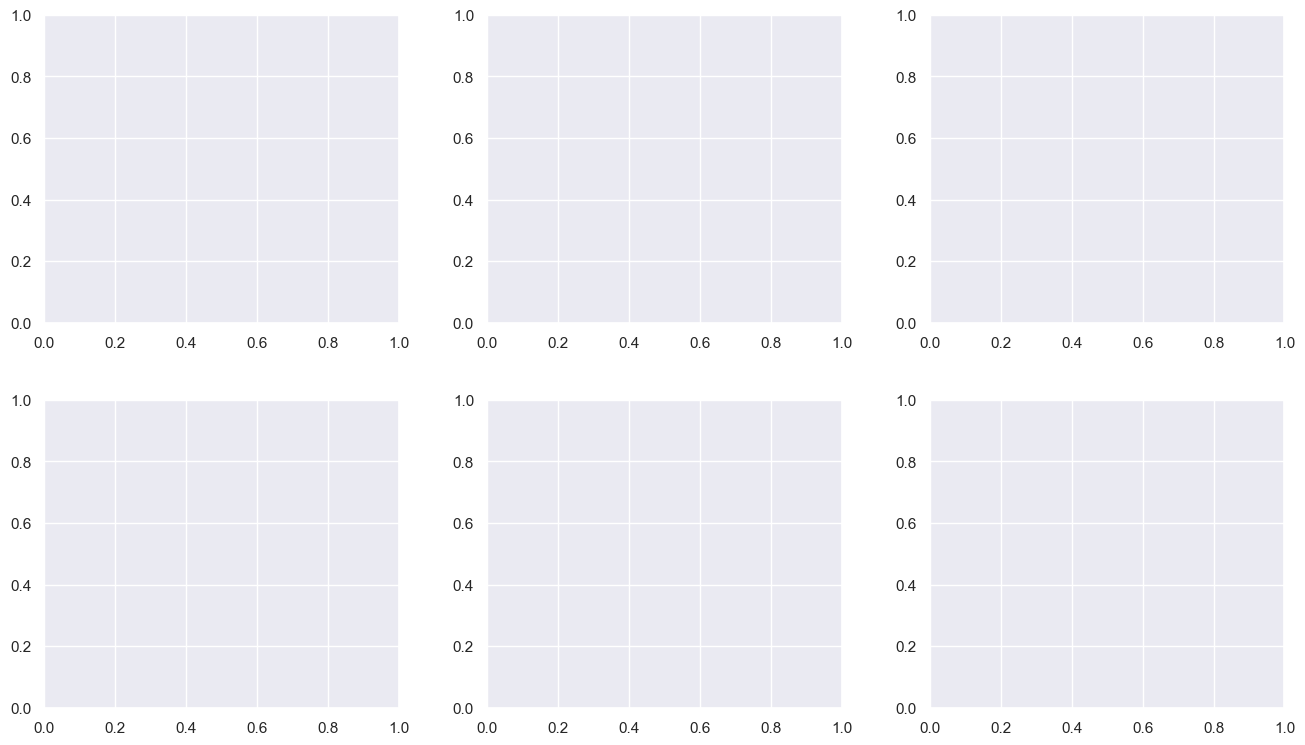

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
plt.subplots_adjust(hspace=0.25, wspace=0.25)

# -----------------
# 1-way PDPs
# -----------------
axes[0, 0].plot(temp_grid, pdp_temp)
axes[0, 1].plot(sw_grid, pdp_sw)
axes[0, 2].plot(wind_grid, pdp_wind)

axes[0, 0].set_xlabel("air temperature (°C)")
axes[0, 1].set_xlabel("shortwave radiation (W m$^{-2}$)") 
axes[0, 2].set_xlabel("wind speed (m s$^{-1}$)")

for ax in axes[0, :]:
    ax.set_ylabel("partial dependence")
    ax.set_ylim(vmin, vmax)

# -----------------
# 2-way PDPs
# -----------------
cs1 = axes[1, 0].contourf(
    temp_grid, sw_grid, pdp_temp_sw,
    levels=levels, cmap="magma", vmin=vmin, vmax=vmax
)
axes[1, 0].contour(temp_grid, sw_grid, pdp_temp_sw, levels=levels, colors="k", linewidths=0.5)

cs2 = axes[1, 1].contourf(
    temp_grid, wind_grid, pdp_temp_wind,
    levels=levels, cmap="magma", vmin=vmin, vmax=vmax
)
axes[1, 1].contour(temp_grid, wind_grid, pdp_temp_wind, levels=levels, colors="k", linewidths=0.5)

cs3 = axes[1, 2].contourf(
    sw_grid, wind_grid, pdp_sw_wind,
    levels=levels, cmap="magma", vmin=vmin, vmax=vmax
)
axes[1, 2].contour(sw_grid, wind_grid, pdp_sw_wind, levels=levels, colors="k", linewidths=0.5)

# Axis labels
axes[1, 0].set_xlabel("air temperature (°C)")
axes[1, 0].set_ylabel("shortwave radiation (W m$^{-2}$)")

axes[1, 1].set_xlabel("air temperature (°C)")
axes[1, 1].set_ylabel("wind speed (m s$^{-1}$)")

axes[1, 2].set_xlabel("shortwave radiation (W m$^{-2}$)")
axes[1, 2].set_ylabel("wind speed (m s$^{-1}$)")

# Axis limits
axes[1, 0].set_xlim(-25, 2); axes[1, 0].set_ylim(0, 800)
axes[1, 1].set_xlim(-25, 2); axes[1, 1].set_ylim(0, 10)
axes[1, 2].set_xlim(0, 800); axes[1, 2].set_ylim(0, 10)

# -----------------
# Shared colorbar
# -----------------
# Create custom axes for colorbar positioned outside the figure
cbar_ax = fig.add_axes([0.91, 0.105, 0.01, 0.327]) # [left, bottom, width, height]
cbar = fig.colorbar(
    cm.ScalarMappable(cmap="magma", norm=plt.Normalize(vmin, vmax)),
    cax=cbar_ax
)
cbar.set_label("predicted probability of unloading", rotation=270, labelpad=15) # or should the label here be partial dependence?

# -----------------
# Panel labels
# -----------------
# labels = ["A", "B", "C", "D", "E", "F"]
# for ax, lab in zip(axes.ravel(), labels):
#     ax.text(0.01, 0.93, f"{lab})", transform=ax.transAxes,
#             fontsize=13, color="grey")

# Panel labels, changing colors by row instead 
axes[0, 0].text(0.01, 0.93, "A)", transform=axes[0, 0].transAxes, fontsize=13, color="grey")
axes[0, 1].text(0.01, 0.93, "B)", transform=axes[0, 1].transAxes, fontsize=13, color="grey")
axes[0, 2].text(0.01, 0.93, "C)", transform=axes[0, 2].transAxes, fontsize=13, color="grey")

axes[1, 0].text(0.01, 0.93, "D)", transform=axes[1, 0].transAxes, fontsize=13, color="white")
axes[1, 1].text(0.01, 0.93, "E)", transform=axes[1, 1].transAxes, fontsize=13, color="white")
axes[1, 2].text(0.01, 0.93, "F)", transform=axes[1, 2].transAxes, fontsize=13, color="white")


# Add titles to 1-way PDPs and to the 2-way PDPs centered over the figure 
axes[0, 1].set_title("1-way Partial Dependence Plots (PDP)", fontsize=16, pad=15)
axes[1, 1].set_title("2-way Partial Dependence Plots (PDP)", fontsize=16, pad=15)

# add some verticle space between the two rows
plt.subplots_adjust(hspace=0.4)

# save the figure in 500 DPI 
# plt.savefig("/home/cassie/python/repos/unloading_regimes_analysis/manuscript_figures/figures/Figures_7_manual.png",
            # dpi=500, bbox_inches="tight")

plt.show()


So, this is the same as sklearn, except it does not have interpolation between points which is why it doesn't appear as smooth

## Add Interpolation 

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator

Example interpolating with 1-way PDP

In [59]:
f = interp1d(temp_grid, pdp_temp, kind="cubic")
temp_fine = np.linspace(temp_grid.min(), temp_grid.max(), 300)
pdp_fine = f(temp_fine)

plt.plot(temp_fine, pdp_fine, lw=2)

ValueError: x and y arrays must be equal in length along interpolation axis.

In [60]:
f = interp1d(wind_grid, pdp_wind, kind="cubic") # interpolation types linear, cubic, quadratic,
temp_fine = np.linspace(wind_grid.min(), wind_grid.max(), 300)
pdp_fine = f(temp_fine)

plt.plot(temp_fine, pdp_fine, lw=2)

ValueError: x and y arrays must be equal in length along interpolation axis.

Interpolate onto a finer mesh for the contours in 2-way PDP

In [61]:
interp = RegularGridInterpolator(
    (temp_grid, sw_grid),
    pdp_temp_sw
)

temp_fine = np.linspace(temp_grid.min(), temp_grid.max(), 150)
sw_fine   = np.linspace(sw_grid.min(), sw_grid.max(), 150)

TT, SW = np.meshgrid(temp_fine, sw_fine, indexing="ij")
points = np.stack([TT.ravel(), SW.ravel()], axis=-1)

Z_fine = interp(points).reshape(TT.shape)

plt.contourf(TT, SW, Z_fine.T, levels=15, cmap="magma")


ValueError: There are 400 points and 80 values in dimension 0

That looks a lot better.\
An additonal subtle improvement... use quantile-based grids instead od linear grids

In [48]:
# temp_grid = np.linspace(min, max, 50)
# temp_grid = np.quantile(X["air temperature (C)"], np.linspace(0.01, 0.99, 50))

# for now this is throwing an error, but we can come back to it

## Interpolate for all PDPS, then replot

In [49]:
# 1-way
pdp_1d = {
    "air temperature": (temp_grid, pdp_temp),
    "shortwave": (sw_grid, pdp_sw),
    "wind": (wind_grid, pdp_wind),
}

# 2-way
pdp_2d = {
    ("air temperature", "shortwave"): (temp_grid, sw_grid, pdp_temp_sw),
    ("air temperature", "wind"):      (temp_grid, wind_grid, pdp_temp_wind),
    ("shortwave", "wind"):             (sw_grid, wind_grid, pdp_sw_wind),
}

Functions for interpolating, 

In [50]:
def interpolate_1d_pdp(x, y, n=300):
    f = interp1d(x, y, kind="linear", bounds_error=False)
    x_fine = np.linspace(np.min(x), np.max(x), n)
    y_fine = f(x_fine)
    return x_fine, y_fine

# careful with the shape of the mesh produced here... 
def interpolate_2d_pdp(x, y, z, nx=150, ny=150):
    """
    x: first variable (x-axis)
    y: second variable (y-axis)
    z: PDP values with shape (len(x), len(y))
    """

    interp = RegularGridInterpolator(
        (x, y),
        z,
        bounds_error=False
    )

    x_fine = np.linspace(x.min(), x.max(), nx)
    y_fine = np.linspace(y.min(), y.max(), ny)

    XX, YY = np.meshgrid(x_fine, y_fine, indexing="xy")
    pts = np.stack([XX.ravel(), YY.ravel()], axis=-1)

    Z = interp(pts).reshape(YY.shape)  # (ny, nx) → contourf-ready

    return x_fine, y_fine, Z

# Figure 8, with interpolation

ValueError: x and y arrays must be equal in length along interpolation axis.

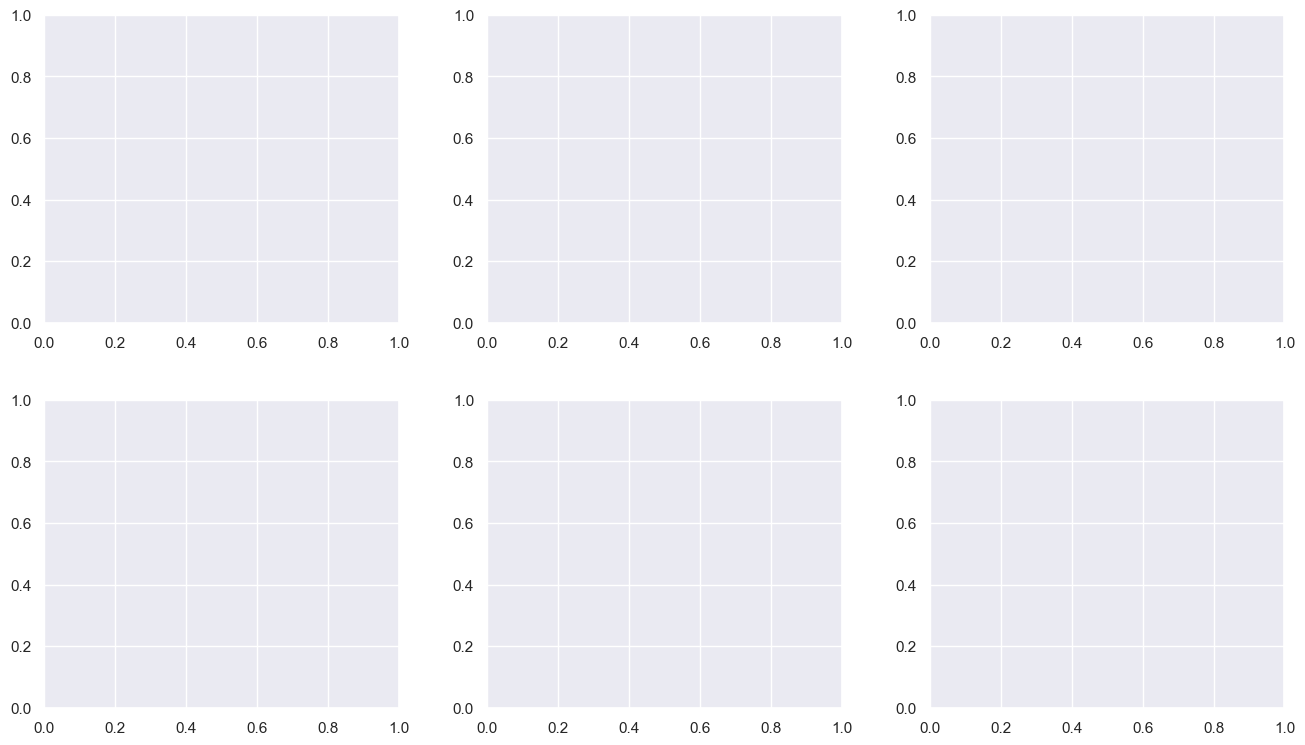

In [51]:
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(16, 9),
    constrained_layout=False
)

plt.subplots_adjust(hspace=0.25, wspace=0.25)

# -----------------
# 1-way 
# -----------------

one_way_order = [
    "air temperature",
    "shortwave",
    "wind"
]

xlabels = {
    "air temperature": "air temperature (°C)",
    "shortwave": "shortwave radiation (W m$^{-2}$)",
    "wind": "wind speed (m s$^{-1}$)"
}

for i, var in enumerate(one_way_order):
    x, y = pdp_1d[var]
    x_fine, y_fine = interpolate_1d_pdp(x, y)

    ax = axes[0, i]
    ax.plot(x_fine, y_fine, lw=2)
    ax.set_xlabel(xlabels[var])
    ax.set_ylabel("partial dependence")
    ax.set_ylim(0.15, 0.60)
    
# -----------------   
# 2-way
# -----------------

two_way_order = [
    ("air temperature", "shortwave"),
    ("air temperature", "wind"),
    ("shortwave", "wind")
]

for i, (v1, v2) in enumerate(two_way_order):
    x, y, z = pdp_2d[(v1, v2)]

    xf, yf, zf = interpolate_2d_pdp(x, y, z)

    ax = axes[1, i]
    cf = ax.contourf(
        xf, yf, zf.T, # I HAD TO ADD A .T HERE FOR THE ORIENTATION TO BE CORRECT IN THE CONTOR 
        levels=15,
        cmap="magma",
        vmin=0.15,
        vmax=0.60
    )

    ax.set_xlabel(xlabels[v1])
    ax.set_ylabel(xlabels[v2])
    
# -----------------    
# Axis labels
# -----------------

axes[1, 0].set_xlabel("air temperature (°C)")
axes[1, 0].set_ylabel("shortwave radiation (W m$^{-2}$)")

axes[1, 1].set_xlabel("air temperature (°C)")
axes[1, 1].set_ylabel("wind speed (m s$^{-1}$)")

axes[1, 2].set_xlabel("shortwave radiation (W m$^{-2}$)")
axes[1, 2].set_ylabel("wind speed (m s$^{-1}$)")

# Axis limits
axes[1, 0].set_xlim(-25, 2); axes[1, 0].set_ylim(0, 800)
axes[1, 1].set_xlim(-25, 2); axes[1, 1].set_ylim(0, 10)
axes[1, 2].set_xlim(0, 800); axes[1, 2].set_ylim(0, 10)

# -----------------
# Shared colorbar
# -----------------
# Create custom axes for colorbar positioned outside the figure
cbar_ax = fig.add_axes([0.91, 0.105, 0.01, 0.327]) # [left, bottom, width, height]
cbar = fig.colorbar(
    cm.ScalarMappable(cmap="magma", norm=plt.Normalize(vmin, vmax)),
    cax=cbar_ax
)
cbar.set_label("predicted probability of unloading", rotation=270, labelpad=15) # or should the label here be partial dependence?

# -----------------
# Panel labels
# -----------------
# labels = ["A", "B", "C", "D", "E", "F"]
# for ax, lab in zip(axes.ravel(), labels):
#     ax.text(0.01, 0.93, f"{lab})", transform=ax.transAxes,
#             fontsize=13, color="grey")

# Panel labels, changing colors by row instead 
axes[0, 0].text(0.01, 0.93, "A)", transform=axes[0, 0].transAxes, fontsize=13, color="grey")
axes[0, 1].text(0.01, 0.93, "B)", transform=axes[0, 1].transAxes, fontsize=13, color="grey")
axes[0, 2].text(0.01, 0.93, "C)", transform=axes[0, 2].transAxes, fontsize=13, color="grey")

axes[1, 0].text(0.01, 0.93, "D)", transform=axes[1, 0].transAxes, fontsize=13, color="white")
axes[1, 1].text(0.01, 0.93, "E)", transform=axes[1, 1].transAxes, fontsize=13, color="white")
axes[1, 2].text(0.01, 0.93, "F)", transform=axes[1, 2].transAxes, fontsize=13, color="white")


# Add titles to 1-way PDPs and to the 2-way PDPs centered over the figure 
axes[0, 1].set_title("1-way Partial Dependence Plots (PDP)", fontsize=16, pad=15)
axes[1, 1].set_title("2-way Partial Dependence Plots (PDP)", fontsize=16, pad=15)

# add some verticle space between the two rows
plt.subplots_adjust(hspace=0.4)

# save the figure in 500 DPI 
# plt.savefig("/home/cassie/python/repos/unloading_regimes_analysis/manuscript_figures/figures/Figures_7_manual.png",
            # dpi=500, bbox_inches="tight")

plt.show()

# Figure 8

Set up subset of the data

In [27]:
X_cold = X_features[X_features["air temperature (C)"] < 0].copy()
X_warm = X_features[X_features["air temperature (C)"] >= 0].copy()

# Load the PDP data from the previous script into variables to use here 
# figure 8 pdp data 2-way 
pdp_sw_wind_cold = data["pdp_sw_wind_cold"]
pdp_sw_wind_warm = data["pdp_sw_wind_warm"]

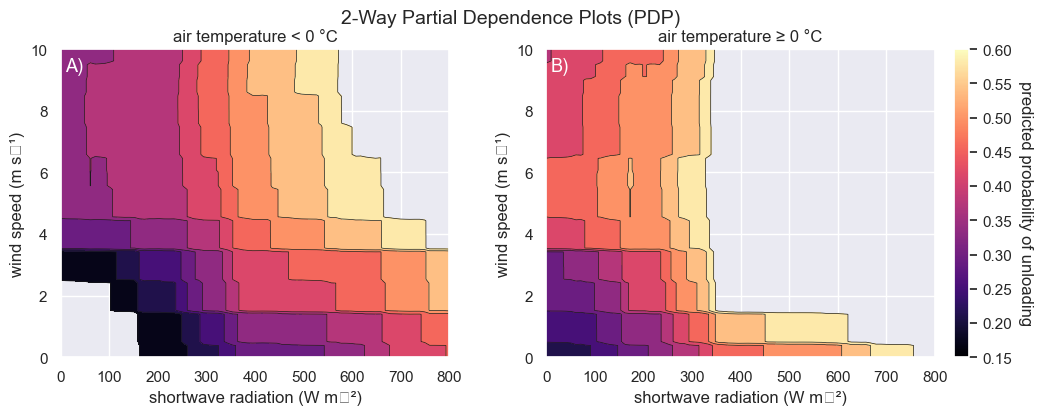

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)

for ax, Z, title in zip(
    axes,
    [pdp_sw_wind_cold, pdp_sw_wind_warm],
    ["air temperature < 0 °C", "air temperature ≥ 0 °C"]
):
    cf = ax.contourf(
        sw_grid, wind_grid, Z,
        levels=levels, cmap="magma",
        vmin=vmin, vmax=vmax
    )
    ax.contour(sw_grid, wind_grid, Z, levels=levels, colors="k", linewidths=0.5)
    ax.set_xlabel("shortwave radiation (W m⁻²)")
    ax.set_ylabel("wind speed (m s⁻¹)")
    ax.set_title(title)

cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=plt.Normalize(vmin, vmax), cmap="magma"),
    ax=axes, fraction=0.04, pad=0.02
)
cbar.set_label("predicted probability of unloading", rotation=270, labelpad=15) # or should the label here be partial dependence?

# Panel labels
axes[0].text(0.01, 0.93, "A)", transform=axes[0].transAxes,
             fontsize=13, color="white")
axes[1].text(0.01, 0.93, "B)", transform=axes[1].transAxes,
             fontsize=13, color="white")

# add a suptitle over the figures 
plt.suptitle('2-Way Partial Dependence Plots (PDP)', fontsize=14)

# save the figure 
# plt.savefig("/home/cassie/python/repos/unloading_regimes_analysis/manuscript_figures/figures/Figures_8_manual.png",
            # dpi=500, bbox_inches="tight")

plt.show()

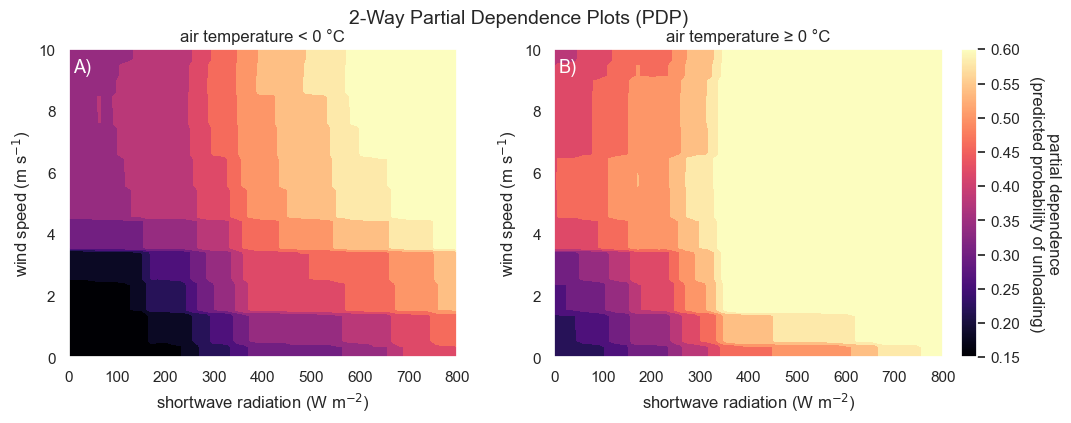

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)

for ax, Z, title in zip(
    axes,
    [pdp_sw_wind_cold, pdp_sw_wind_warm],
    ["air temperature < 0 °C", "air temperature ≥ 0 °C"]
):
    # --- INTERPOLATION STEP
    xf, yf, zf = interpolate_2d_pdp(sw_grid, wind_grid, Z)

    cf = ax.contourf(
        xf,
        yf,
        zf.T,                 # orientation fix
        # levels=levels,
        levels=15,
        cmap="magma",
        vmin=vmin,
        vmax=vmax
    )

    # ax.contour(
    #     xf,
    #     yf,
    #     zf.T,
    #     levels=levels,
    #     colors="k",
    #     linewidths=0.5
    # )

    ax.set_xlabel("shortwave radiation (W m$^{-2}$)")
    ax.set_ylabel("wind speed (m s$^{-1}$)")
    ax.set_title(title)

# Shared colorbar
cbar = fig.colorbar(
    plt.cm.ScalarMappable(
        norm=plt.Normalize(vmin, vmax),
        cmap="magma"
    ),
    ax=axes,
    fraction=0.04,
    pad=0.02
)

cbar.set_label(
    "partial dependence\n(predicted probability of unloading)",
    rotation=270,
    labelpad=30
)

# Panel labels
axes[0].text(0.01, 0.97, "A)", transform=axes[0].transAxes,
             fontsize=13, color="white",
             ha="left", va="top")

axes[1].text(0.01, 0.97, "B)", transform=axes[1].transAxes,
             fontsize=13, color="white",
             ha="left", va="top")

# add a suptitle over the figures 
plt.suptitle('2-Way Partial Dependence Plots (PDP)', fontsize=14)

# save the figure 
# plt.savefig("/home/cassie/python/repos/unloading_regimes_analysis/manuscript_figures/figures/Figures_8_manual.png", dpi=500, bbox_inches="tight")

plt.show()


Should add manual interpolation to the 1-way just like the 2-way to make the most smooth figures

# Bootstrap Implementation

In [ ]:
def bootstrap_pdp_1d(model, X, feature, grid, n_boot=200, ci=(5, 95)):
    pdps = []

    for _ in range(n_boot):
        X_bs = X.sample(frac=1.0, replace=True)
        pdps.append(compute_pdp_1d(model, X_bs, feature, grid))

    pdps = np.array(pdps)

    mean = pdps.mean(axis=0)
    lower = np.percentile(pdps, ci[0], axis=0)
    upper = np.percentile(pdps, ci[1], axis=0)

    return mean, lower, upper


Example with the air temperature PDP with confience intervals

In [ ]:
mean_t, lo_t, hi_t = bootstrap_pdp_1d(
    model, X_features, "air temperature (C)", temp_grid
)

plt.figure(figsize=(4, 3))
plt.plot(temp_grid, mean_t, color="black")
plt.fill_between(temp_grid, lo_t, hi_t, alpha=0.25)
plt.xlabel("air temperature (°C)")
plt.ylabel("partial dependence")
plt.ylim(vmin, vmax)
plt.show()

The bootstrap implementation adds confience intervals (CI) to the 1-way PDPs only (far too computationally heavy for 2-way PDP and not often used)
